<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Reduccion_de_la_varianza_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reducción de varianza**
## Muestreo importancia

Notemos que podemos reescribir la integral
$$ I = ∫ f(x) dx = \int [ \frac{f(x)}{g(x)} ] g(x) dx, \quad g(x)\neq 0 $$

y reinterpretando:
$$ I = E_{g} ( \frac{f(x)}{g(x)} )  $$

y usamos el estimador
$$ \theta_3 = \frac{1}{N} ∑_{i=1}^{N} \frac{f(x_i)}{g(x_i)}, \quad x_i \thicksim g(x) $$


Las librerias que vamos a ocupar son las siguientes:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

Para resolver este ejercicio tenemos la función:
$$ f(x) = \cos (\frac{\pi x}{2}) $$

In [ ]:
def f(x):
	f = np.cos( (x * np.pi) / 2 )
	return f

In [ ]:
def g(x):
	g = (24 / (24 - np.pi ** 2)) * (1 - ((np.pi ** 2) * (x **2)) / 8 )
	return g

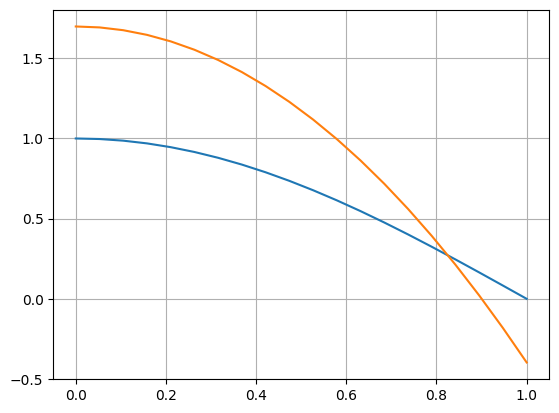

In [ ]:
xx = np.linspace(0,1,20)
plt.plot(xx,f(xx))
plt.plot(xx,g(xx))
plt.grid()

In [ ]:
def muestra_g(n):
	c = 24 / (24 - np.pi ** 2)
	lista = []
	for i in range (n):
		u = rd.random()
		w = rd.uniform(0,c)
		if w <= g(u):
			lista.append(u)
	return lista

In [ ]:
M = muestra_g(1000)

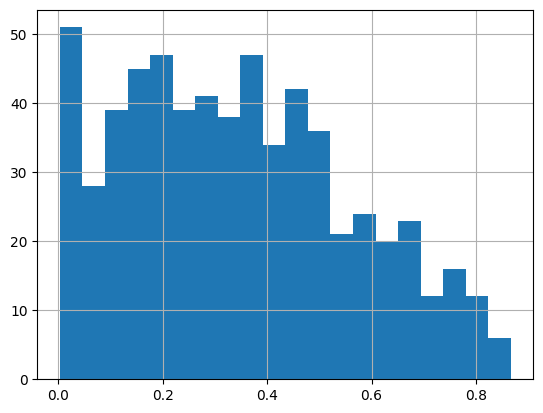

In [ ]:
plt.hist(M,bins=20)
plt.grid()

In [ ]:
def crudo(N):
  G = []
  u = muestra_g(N)
  for i in u:
    G.append(f(i)/g(i))
  return np.mean(G), np.var(G), np.std(G)

In [ ]:
crudo(1000)

(np.float64(0.614119797219087),
 np.float64(0.006913563619648741),
 np.float64(0.08314784194222205))